In [5]:
import cv2

import numpy as np

import sys
sys.path.append('../')
import compression as C

from PIL import Image
from subprocess import Popen, PIPE
import tempfile

from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def convert_to_rgb(img):

    colorized = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)

    colorized[:, :, 0] = img % (2**8)
    img = img >> 8
    colorized[:,:,1] = img % (2**8)
    img = img >> 8
    colorized[:,:,2] = img % (2**8)
    
    return colorized

def convert_from_rgb(frame):

    img_ = np.zeros((frame.shape[0], frame.shape[1]), dtype=np.uint64)
    img_[:] = (
        frame[:, :, 0] +
        frame[:, :, 1] * 256 +
        frame[:, :, 2] * 256 * 256
    )
    
    return img_

In [3]:
data = C.Util.load_data('cylinder', 3)

In [100]:
tempfile.mktemp()

'/tmp/tmpKO2C1V'

In [16]:
outlog = '/tmp/NEWTEST.log'#tempfile.TemporaryFile()
outvideo = '/tmp/NEWTEST.MP4'

process_output = open(outlog,'w')
p = Popen(['ffmpeg', 
           '-f', 'rawvideo',
           '-vcodec', 'rawvideo',
           '-y', 
           '-r', str(data.shape[0]),
           '-video_size', str(data.shape[1])+'x'+str(data.shape[2]),
           '-pixel_format', 'yuv444p',
           '-i', '-',
           '-c:v', 'libx264',
           '-pix_fmt', 'yuv444p',
           '-profile:v', 'high444',
           '-crf', '0',
           '-preset:v', 'slow',
           outvideo], stdin=PIPE, stdout=process_output, stderr=process_output)
  

    
for z in range(data.shape[0]):
    
    convert_to_rgb(data[z]).tofile(p.stdin)

p.stdin.close()
p.wait()
process_output.close()


with open(outlog, 'r') as f:
    print "\n".join(f.readlines())

 ffmpeg version 2.4.3-1ubuntu1~trusty6 Copyright (c) 2000-2014 the FFmpeg developers

  built on Nov 22 2014 17:07:19 with gcc 4.8 (Ubuntu 4.8.2-19ubuntu1)

  configuration: --prefix=/usr --extra-version='1ubuntu1~trusty6' --build-suffix=-ffmpeg --toolchain=hardened --extra-cflags= --extra-cxxflags= --libdir=/usr/lib/x86_64-linux-gnu --shlibdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --enable-shared --disable-stripping --enable-avresample --enable-avisynth --enable-fontconfig --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmodplug --enable-libmp3lame --enable-libopenjpeg --enable-libopus --enable-libpulse --enable-librtmp --enable-libschroedinger --enable-libshine --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable

In [74]:
import os
process_output = open('/tmp/read.log','w')
p = Popen(['ffmpeg', 
           
           
              
#            '-pixel_format', 'yuv444p',
           '-i', '/tmp/NEWTEST.MP4', 
           '-vcodec', 'rawvideo',        
           '-f', 'image2pipe',
           '-video_size', str(data.shape[1])+'x'+str(data.shape[2]),
           '-pix_fmt', 'yuv444p',
           '-'
          ], stdout=PIPE, stderr=process_output)



# p.communicate()
a = p.stdout.read(2048*2048*3*3)
# os.read(p.stdout.fileno(), 4096)

In [66]:
with open('/tmp/read.log', 'r') as f:
    print "\n".join(f.readlines())

ffmpeg version 2.4.3-1ubuntu1~trusty6 Copyright (c) 2000-2014 the FFmpeg developers

  built on Nov 22 2014 17:07:19 with gcc 4.8 (Ubuntu 4.8.2-19ubuntu1)

  configuration: --prefix=/usr --extra-version='1ubuntu1~trusty6' --build-suffix=-ffmpeg --toolchain=hardened --extra-cflags= --extra-cxxflags= --libdir=/usr/lib/x86_64-linux-gnu --shlibdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --enable-shared --disable-stripping --enable-avresample --enable-avisynth --enable-fontconfig --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmodplug --enable-libmp3lame --enable-libopenjpeg --enable-libopus --enable-libpulse --enable-librtmp --enable-libschroedinger --enable-libshine --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-

In [76]:
ione = a[0:len(a) / 3]

In [77]:
ione[0:10]

'\x01\x00\x00\x01\x00\x00\x01\x00\x00\x01'

In [83]:
convert_to_rgb(data[0]).tobytes()[0:10]

'\x01\x00\x00\x01\x00\x00\x01\x00\x00\x01'

In [91]:
aaa = np.fromstring(ione, dtype=np.uint8)

In [93]:
ione2 = aaa.reshape((2048,2048,3))

In [95]:
ione2 = convert_from_rgb(ione2)

In [97]:
np.array_equal(data[0], ione2)

True

In [101]:
tempfile.mktemp(suffix='.mp4')

'/tmp/tmpbFNqUI.mp4'

In [82]:
len(a) / 3

12582912

In [17]:
for z in range(data.shape[0]):
    
    convert_to_rgb(data[z]).tofile('/tmp/fritzout/fritz_'+str(z).zfill(2)+'.raw')
    print z

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


In [19]:
with open('/home/d/test1.raw', 'rb') as f:
    aaa = f.read()

In [20]:
len(aaa)

12582912

In [24]:
aaa[0:100]

'\x01\x00\x00\x01\x00\x00\x01\x00\x00\x01\x00\x00\x01\x00\x00\x01\x00\x00\x01\x00\x00\x01\x00\x00\x01\x00\x00\x01\x00\x00\x01\x00\x00\x01\x00\x00\x01\x00\x00\x01\x00\x00\x01\x00\x00\x01\x00\x00\x01\x00\x00\x01\x00\x00\x01\x00\x00\x01\x00\x00\x01\x00\x00\x01\x00\x00\x01\x00\x00\x01\x00\x00\x01\x00\x00\x01\x00\x00\x01\x00\x00\x01\x00\x00\x01\x00\x00\x01\x00\x00\x01\x00\x00\x01\x00\x00\x01\x00\x00\x01'

In [25]:
data[0][0:100]

array([[    1,     1,     1, ..., 11512, 11512, 11512],
       [    1,     1,     1, ..., 11512, 11512, 11512],
       [    1,     1,     1, ..., 11512, 11512, 11512],
       ..., 
       [   33,    33,    33, ..., 11514, 11514, 11514],
       [   33,    33,    33, ..., 11514, 11514, 11514],
       [   33,    33,    33, ..., 11514, 11514, 11514]], dtype=uint64)

In [26]:
np.fromstring(aaa)

array([  1.39067124e-309,   7.29112897e-304,   5.43230955e-312, ...,
         8.96878058e-044,   2.98777025e-310,   1.27854848e-307])

In [12]:
a = ''
for z in range(30):
    a += 'fritz_'+str(z).zfill(2)+'.yuv '

In [29]:
import mahotas as mh
aaa=mh.imread('/home/d/test1.png')

In [30]:
convert_from_rgb(aaa)

array([[31488, 16896,  9984, ..., 18688, 65280,  1115],
       [15104, 65280,  1115, ..., 44800,  5632, 57600],
       [25600, 14592, 57600, ..., 65346, 30208,  9984],
       ..., 
       [11090, 23808, 65320, ..., 65280, 13161, 10240],
       [51968,    51, 10240, ..., 31744, 65280, 37120],
       [22528, 65280, 37120, ...,   221, 14848, 65320]], dtype=uint64)

In [8]:
import cv2

In [12]:
cap = cv2.VideoCapture('/tmp/TEST.mp4')
while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()
    
    frame = convert_from_rgb(frame)
    
    break

In [13]:
frame

array([[22528, 22272, 19200, ..., 13056, 58880, 17664],
       [20736, 65337, 16896, ..., 36864, 21248, 45568],
       [26624, 16640, 46080, ..., 65486, 28160, 15104],
       ..., 
       [24576, 13824, 65314, ..., 53778, 22016,  7936],
       [34816, 16128, 15616, ..., 31232, 65280, 35584],
       [28416, 65307, 33792, ..., 17408, 19200, 65346]], dtype=uint64)

In [11]:
data[0]

array([[    1,     1,     1, ..., 11512, 11512, 11512],
       [    1,     1,     1, ..., 11512, 11512, 11512],
       [    1,     1,     1, ..., 11512, 11512, 11512],
       ..., 
       [ 3237,  3237,  3237, ..., 14080, 14076, 14076],
       [ 3237,  3237,  3237, ..., 14080, 14080, 14076],
       [ 3237,  3237,  3237, ..., 14080, 14080, 14076]], dtype=uint64)

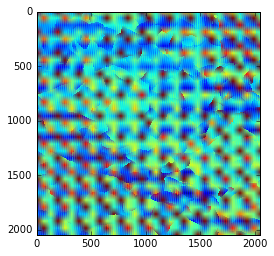

In [14]:
imshow(frame)